# Project B - Morten

## Microenvironment sensor data

The purpose of this section of our project is to get an understanding of the microenvironment in Melbourne. We want to figure out 2 things with this data. We want to find out where the best place to live in Melbourne is, and we will use other datasets for this task also.

Second we want to use this dataset exclusively to predict the microenvironment in the future, so we can estimate where the best place to live in the future will be.

### Step 1: Adding location data to the main dataframe

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_mcr=pd.read_csv("Microclimate_Sensor_Readings.csv")
df_l=pd.read_csv("Microclimate_Sensor_Locations.csv")

In [4]:
df_mcr.shape

(3619496, 8)

In [5]:
df_l.shape

(16, 10)

In [6]:
df_mcr.head()

,id,site_id,gateway_hub_id,sensor_id,value,local_time,type,units
0,1,1001,arc1045,0a.EPA-1h,3.9,2019/11/15 09:00:00 AM,PM2.5-EPA-1h,ug/m^3
1,2,1001,arc1045,0a.EPA-1h.NOPK,3.9,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-NOPK,ug/m^3
2,3,1001,arc1045,0a.EPA-1h.NOPK.EPA-24h,5.5,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-NOPK-EPA-24h,ug/m^3
3,4,1001,arc1045,0a.EPA-1h.PKIND,1.0,2019/11/15 09:00:00 AM,PM2.5-EPA-1h-PKIND,0/1
4,5,1001,arc1045,0a.EPA-24h,5.5,2019/11/15 09:00:00 AM,PM2.5-EPA-24h,ug/m^3


In [7]:
unit=df_mcr["units"].unique()
unit

sensor=df_mcr["gateway_hub_id"].unique()
sensor

array(['arc1045', 'arc1046', 'arc1047', 'arc1048', 'arc1050', 'arc1112',
       'arc1055', 'arc1049', 'arc1113'], dtype=object)

In [8]:
# To datetime operations
df_mcr["local_time"]=pd.to_datetime(df_mcr["local_time"],format='%Y/%m/%d %I:%M:%S %p')

### Hvad er det jeg gerne vil vise med dette dataset?

Jeg har 16 locationer der måler alt muligt gøgl. 16 steder er jo ikke så meget når det drejer sig om at finde det bedste sted at leve. Desuden er flere af dem meget tæt på hinanden, hvilket ikke bidrager til diversiteten.

I forhold til forudsigelserne af målingerne er det også et problem at ikke alle sensorer måler fra samme starttidspunkts. Hvordan skal man så få en ensartet tidslinje?

Jeg bliver nødt til at start med at undersøge omfanget af data. Det gælder både for de forskellige lokationer men også for de forskellige måleparametre. Så hvor meget data er der for eksemple på temperatur i dette område inden for en given periode?

In [9]:
# Measurements on df_mcr.
for i in range(len(unit)):
    temp=df_mcr.loc[df_mcr["units"]==unit[i]]
    first_date = temp["local_time"].min()
    last_date = temp["local_time"].max()
    print(unit[i],"    ",temp.shape, first_date, last_date)


ug/m^3      (1558432, 8) 2019-11-15 09:00:00 2022-04-01 17:00:11
0/1      (182694, 8) 2019-11-15 09:00:00 2022-04-01 16:00:00
C      (500125, 8) 2019-11-15 09:00:00 2022-04-01 17:00:02
%      (500125, 8) 2019-11-15 09:00:00 2022-04-01 17:00:02
hPa      (407881, 8) 2019-11-15 09:15:00 2022-04-01 17:00:02
km/h      (407759, 8) 2019-11-15 09:15:00 2022-04-01 17:00:03
ug\/m^3      (62480, 8) 2021-08-25 18:15:11 2022-04-01 17:00:11


In [10]:
# Measurements on df_mcr.
for i in range(len(sensor)):
    temp=df_mcr.loc[df_mcr["gateway_hub_id"]==sensor[i]]
    first_date = temp["local_time"].min()
    last_date = temp["local_time"].max()
    
    print(sensor[i],"    ",temp.shape, first_date, last_date,temp["units"].unique())

arc1045      (618475, 8) 2019-11-15 09:00:00 2022-04-01 17:00:11 ['ug/m^3' '0/1' 'C' '%' 'hPa' 'km/h']
arc1046      (489023, 8) 2019-11-15 09:00:00 2022-04-01 17:00:11 ['ug/m^3' '0/1' 'C' '%' 'hPa' 'km/h']
arc1047      (498906, 8) 2019-11-15 09:00:00 2022-04-01 17:00:11 ['ug/m^3' '0/1' 'C' '%' 'hPa' 'km/h']
arc1048      (422544, 8) 2019-11-15 09:00:00 2022-04-01 16:00:11 ['ug/m^3' '0/1' 'C' '%' 'hPa' 'km/h']
arc1050      (733886, 8) 2019-11-15 09:00:00 2022-04-01 17:00:11 ['ug/m^3' '%' '0/1' 'C' 'hPa' 'km/h']
arc1112      (268086, 8) 2021-05-20 00:00:00 2022-04-01 17:00:11 ['hPa' 'ug/m^3' '%' 'C' 'km/h' '0/1']
arc1055      (187432, 8) 2021-08-25 18:15:02 2022-04-01 17:00:11 ['ug\\/m^3' 'C' '%' 'km/h' '0/1' 'hPa' 'ug/m^3']
arc1049      (132386, 8) 2021-09-20 18:15:02 2022-04-01 17:00:11 ['0/1' 'km/h' 'ug/m^3' '%' 'hPa' 'C']
arc1113      (268758, 8) 2021-05-20 00:00:00 2022-04-01 17:00:11 ['%' 'ug/m^3' 'hPa' 'km/h' 'C' '0/1']


In [11]:
df_l.head(5)

,site_id,gateway_hub_id,description,last_data,site_status,start_reading,end_reading,longitude,latitude,location
0,1003,arc1047,Pelham Street between Bouverie Street and Leic...,NaN,R,2019/11/15,2021/06/13,144.960923,-37.802300,POINT (144.960923 -37.8023)
1,1008,arc1045,Flinders Street between Swanston Street and El...,NaN,R,2021/06/14,2021/06/20,144.967057,-37.817465,POINT (144.96705703 -37.81746522)
2,1007,arc1113,Siddeley Street between Spencer Street and Wur...,2022/04/01 06:00:01 PM,C,2021/05/20,NaN,144.951835,-37.822460,POINT (144.951835 -37.82246)
3,1012,arc1048,Little Collins Street between Exhibition Stree...,2022/04/01 06:00:01 PM,C,2021/09/17,NaN,144.970000,-37.813333,POINT (144.97 -37.813333)
4,1004,arc1048,Grattan Street between Cardigan Street and Swa...,NaN,R,2019/11/15,2021/06/13,144.964635,-37.800575,POINT (144.964635 -37.800575)


In [12]:
df_l.shape

(16, 10)

In [13]:
lat=df_l["latitude"]
lon=df_l["longitude"]
site=df_l["site_id"]

In [14]:
#Overview of the location of the sensors.

import folium


X=lat
Y=lon

lat_map= -37.808835
lon_map= 144.962457

map1=folium.Map([lat_map, lon_map], zoom_start=14)
for i in range(len(Y)):
    # Circle marker
    folium.CircleMarker([X[i],Y[i]],
                        radius=2,
                        popup=site[i],
                        color="red",
                        ).add_to(map1)


map1

#### Comment on geoplot

First of all its clear from the plot that not alle areas of Melbourne are covered by the sensors. Also it can be seen that some areas the 3 or 4 sensors located very close to each other while other areas only have 1 sensor. For the places that have multiple sensors close to each other, we can see that the date of the records do NOT overlap each other. So eventhough the sensor are ontop of each other they do not cause duplicates in the data, which is good.

To make sense of the data, it we have to also cluster the data, so that the sensors that are on top of each other with none overlapping data is counted as one single sensor.


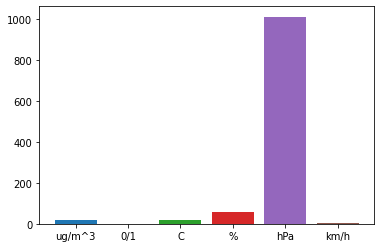

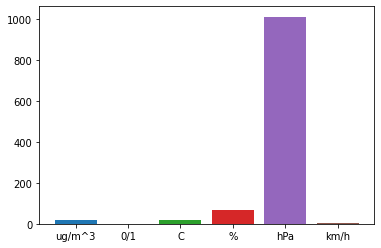

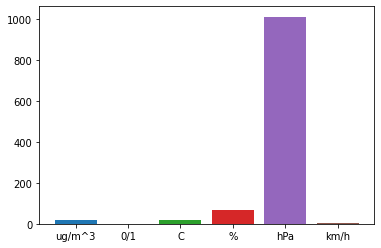

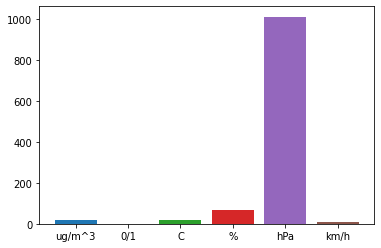

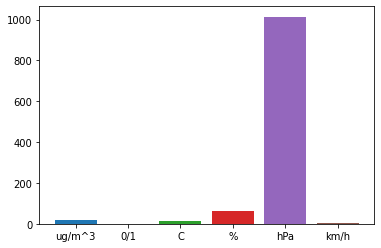

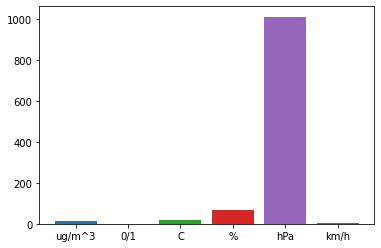

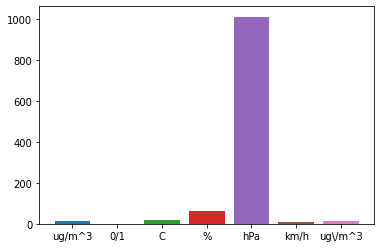

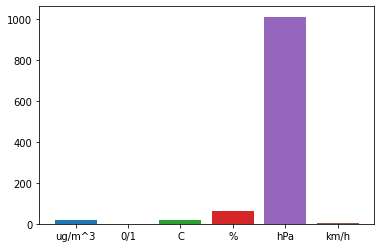

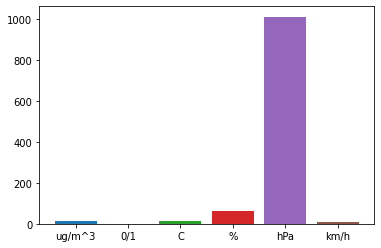

In [15]:
import matplotlib.pyplot as plt
# Measurements on df_mcr.
for i in range(len(sensor)):
    temp_site=df_mcr.loc[df_mcr["gateway_hub_id"]==sensor[i]]
    
    for k in range(len(unit)):
        temp_unit=temp_site.loc[temp_site["units"]==unit[k]]
        mean = temp_unit["value"].mean()
        #print("Sensor:",site[i],"  units",unit[k],"   Value measured:",mean)
        
        plt.bar(unit[k],mean)
    plt.show()

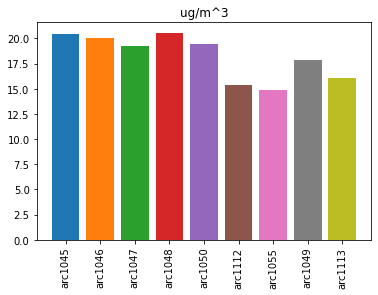

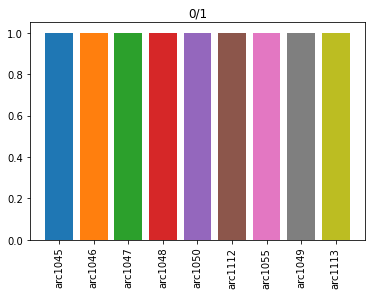

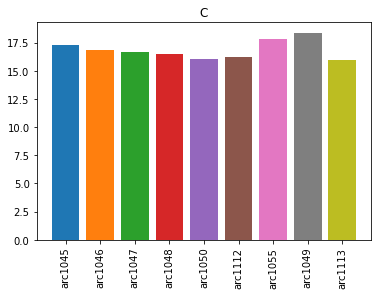

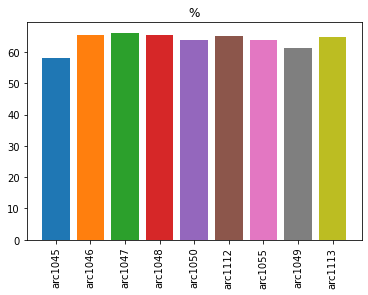

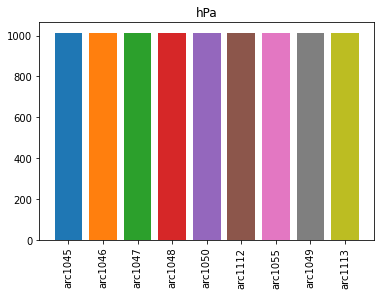

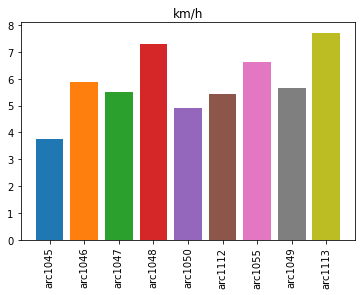

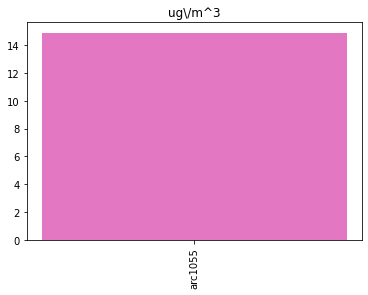

In [16]:
import matplotlib.pyplot as plt
# Measurements on df_mcr.

for k in range(len(unit)):
    temp_site=df_mcr.loc[df_mcr["units"]==unit[k]]
        
        
    for i in range(len(sensor)):
        temp_unit=temp_site.loc[temp_site["gateway_hub_id"]==sensor[i]]
        mean = temp_unit["value"].mean()
        #print("Sensor:",site[i],"  units",unit[k],"   Value measured:",mean)
        
        
        plt.bar(str(sensor[i]),mean)
        plt.title(unit[k])
        plt.xticks(rotation=90)
    plt.show()

From this initial plotting of the data we can see that not all features are equally valueable. Also we can see that some features are more locally different for example wind speed, while others are more different based on location for example wind speed. These plots also show that there is an error in the dataset. We can see the sensor 1011 (arc1055), is measuring particles using a wrong unit format. We can assume that changing the string to the correct format will fix the issue.

In [17]:

import folium
from folium import plugins
from folium.plugins import HeatMap

heat_data = [[row['Y'],row['X']] for index, row in df_prostitution.iterrows()]

X1=df_prostitution ["X"].values
Y1=df_prostitution ["Y"].values

lat= 37.773972
lon= -122.431297
map2=folium.Map([lat, lon], zoom_start=13)

HeatMap(heat_data).add_to(map2)

map2

NameError: name 'df_prostitution' is not defined